In [1]:
# Preparação dos dados
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

sns.set_theme()

In [2]:
## Importar dataset

data_path = '../data/' if os.path.exists(
    '../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/prepared/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)

## Criar o conjunto totalmente númerico
- Visualizar os gráficos e ver a distribuição das variáveis.
- Ver quantos outliers existem por variável

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4914 non-null   int64
 1   mês                                        4914 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64
 4   cpes_domestico_baixa_tensao                4914 non-null   int64
 5   cpes_domestico_alta_tensao                 4914 non-null   int64
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64
 9   cpes_outros_baixa_tensao                   4914 non-null   int64
 10  cpes_outros_alta_tensao                    4914 

## Normalização MinMax

In [4]:
# Normalização com o MinMax
scaler = MinMaxScaler()
merged_df_scaled_min_max = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)

merged_df_scaled_min_max.head()

,ano,mês,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,0.0,0.636364,0.035328,0.046047,0.061788,0.0,0.242784,0.051923,0.109299,0.037529,0.0,0.039942,0.005236
1,0.0,0.727273,0.031719,0.048138,0.061820,0.0,0.242784,0.051836,0.109299,0.036613,0.0,0.040705,0.005236
2,0.0,0.818182,0.032404,0.049713,0.061852,0.0,0.242784,0.051723,0.109299,0.036613,0.0,0.041710,0.005236
3,0.0,0.909091,0.034943,0.046591,0.061888,0.0,0.242784,0.051798,0.109299,0.036156,0.0,0.043251,0.005236
4,0.0,1.000000,0.040670,0.041206,0.061907,0.0,0.243633,0.051848,0.109299,0.037071,0.0,0.044166,0.005236


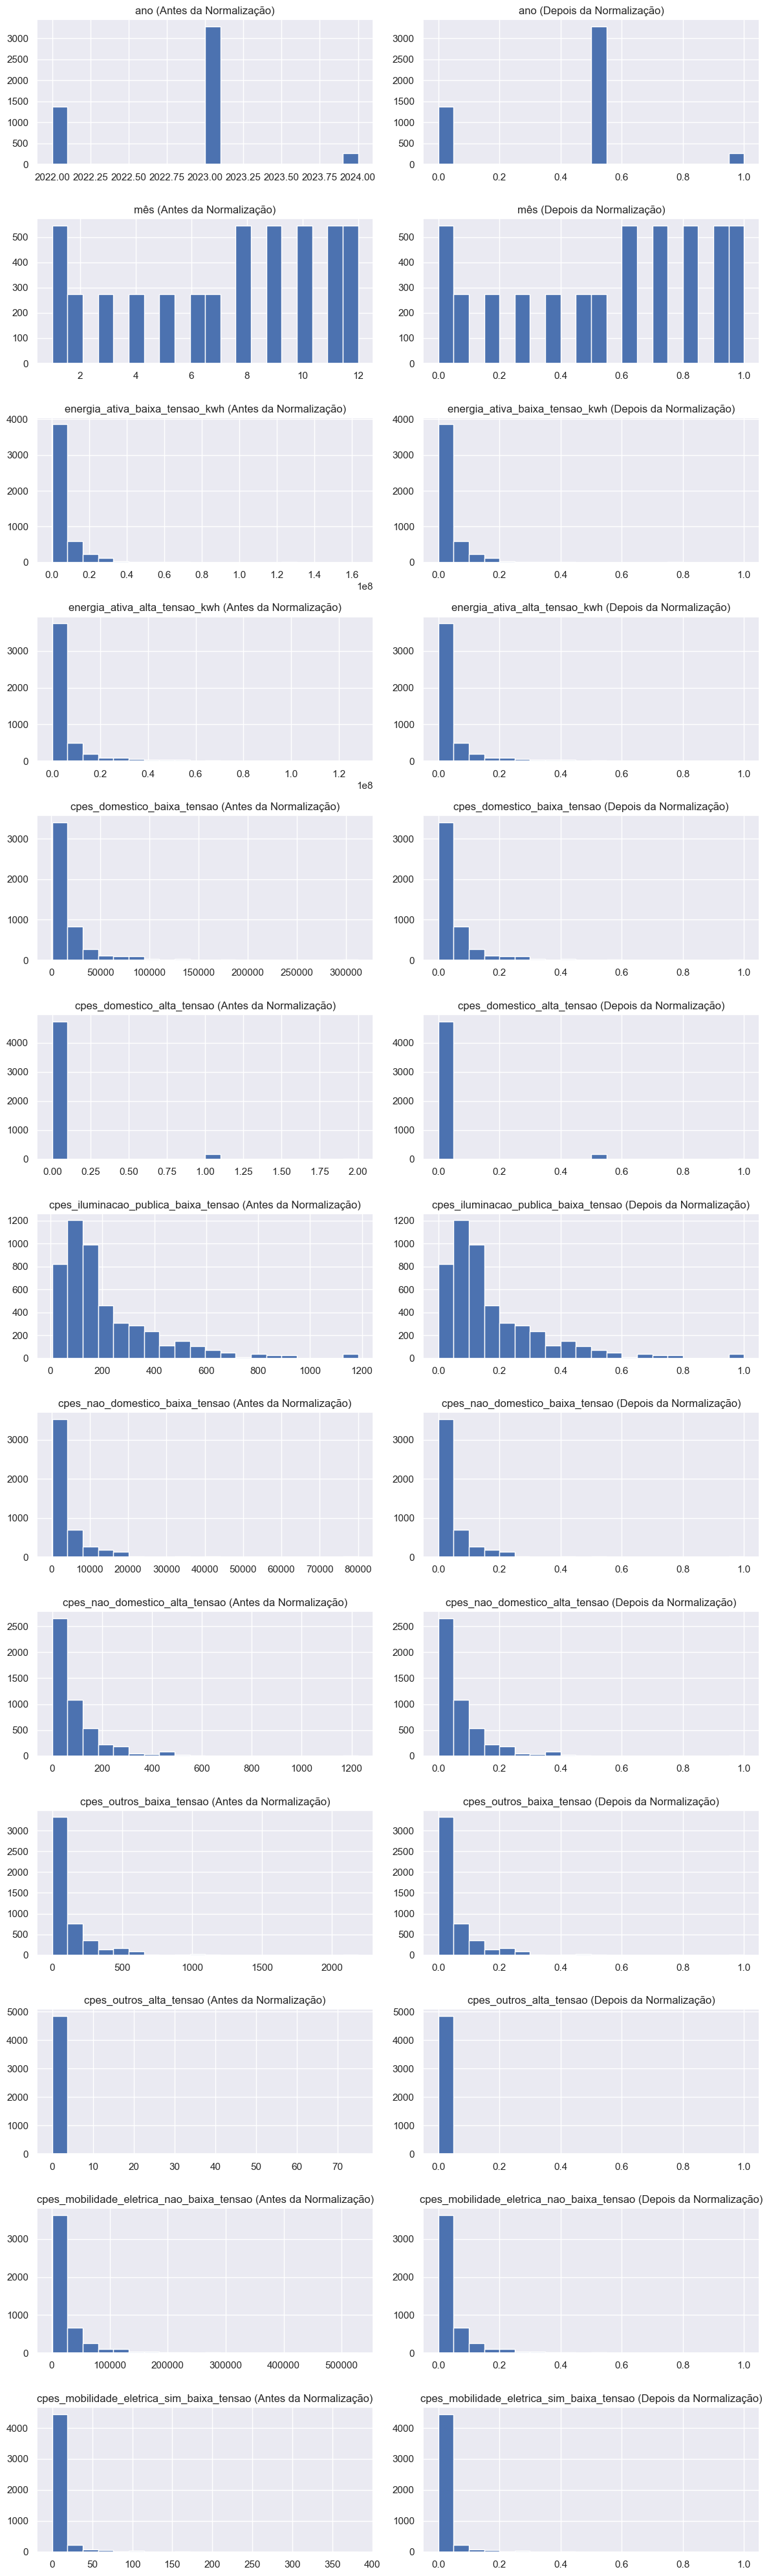

In [5]:
# Criar subplots
fig, axes = plt.subplots(nrows=len(merged_df.columns), ncols=2, figsize=(12, 40))

# Histogramas antes da normalização
for i, col in enumerate(merged_df.columns):
    merged_df[col].hist(ax=axes[i, 0], bins=20)
    axes[i, 0].set_title(col + ' (Antes da Normalização)')

# Histogramas depois da normalização
for i, col in enumerate(merged_df_scaled_min_max.columns):
    merged_df_scaled_min_max[col].hist(ax=axes[i, 1], bins=20)
    axes[i, 1].set_title(col + ' (Depois da Normalização)')

plt.tight_layout()
plt.show()


In [6]:
# Estatísticas resumidas antes da normalização
merged_df.describe()

,ano,mês,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914.000000,4914.000000,4.914000e+03,4.914000e+03,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,2022.777778,7.166667,6.473418e+06,6.872585e+06,18802.326414,0.040090,214.084046,4241.061661,95.435694,128.958079,0.385836,27020.995319,9.315832
std,0.532924,3.625129,1.161919e+07,1.423193e+07,29402.960918,0.209242,194.120963,6870.529538,121.195235,206.186626,4.184540,45854.018577,24.622134
min,2022.000000,1.000000,1.390660e+05,0.000000e+00,1042.000000,0.000000,7.000000,174.000000,0.000000,1.000000,0.000000,1144.000000,0.000000
25%,2022.000000,4.000000,1.269620e+06,4.162925e+05,4581.000000,0.000000,91.000000,1101.000000,28.000000,21.000000,0.000000,6044.000000,2.000000
50%,2023.000000,8.000000,2.618006e+06,1.837661e+06,8936.000000,0.000000,141.000000,1989.500000,51.000000,54.000000,0.000000,11336.000000,2.000000
75%,2023.000000,10.000000,7.045592e+06,5.952910e+06,21427.000000,0.000000,280.000000,4897.250000,119.000000,157.000000,0.000000,29565.500000,6.000000
max,2024.000000,12.000000,1.633807e+08,1.279470e+08,312074.000000,2.000000,1185.000000,79984.000000,1226.000000,2186.000000,75.000000,528158.000000,382.000000


## Normalizar z-Score

In [7]:
# Normalizando utilizando o Z-Score
scaler = StandardScaler()
merged_df_scaled_z_score = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)

merged_df_scaled_z_score.head()

,ano,mês,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,-1.459601,0.229900,-0.048836,-0.068940,0.049581,-0.191613,0.406571,0.011199,0.318232,-0.222918,-0.092215,-0.105279,-0.297154
1,-1.459601,0.505781,-0.099547,-0.050137,0.049921,-0.191613,0.406571,0.010181,0.318232,-0.232619,-0.092215,-0.096512,-0.297154
2,-1.459601,0.781661,-0.089920,-0.035976,0.050261,-0.191613,0.406571,0.008870,0.318232,-0.232619,-0.092215,-0.084952,-0.297154
3,-1.459601,1.057541,-0.054239,-0.064047,0.050635,-0.191613,0.406571,0.009744,0.318232,-0.237470,-0.092215,-0.067242,-0.297154
4,-1.459601,1.333421,0.026228,-0.112463,0.050839,-0.191613,0.411723,0.010326,0.318232,-0.227769,-0.092215,-0.056729,-0.297154


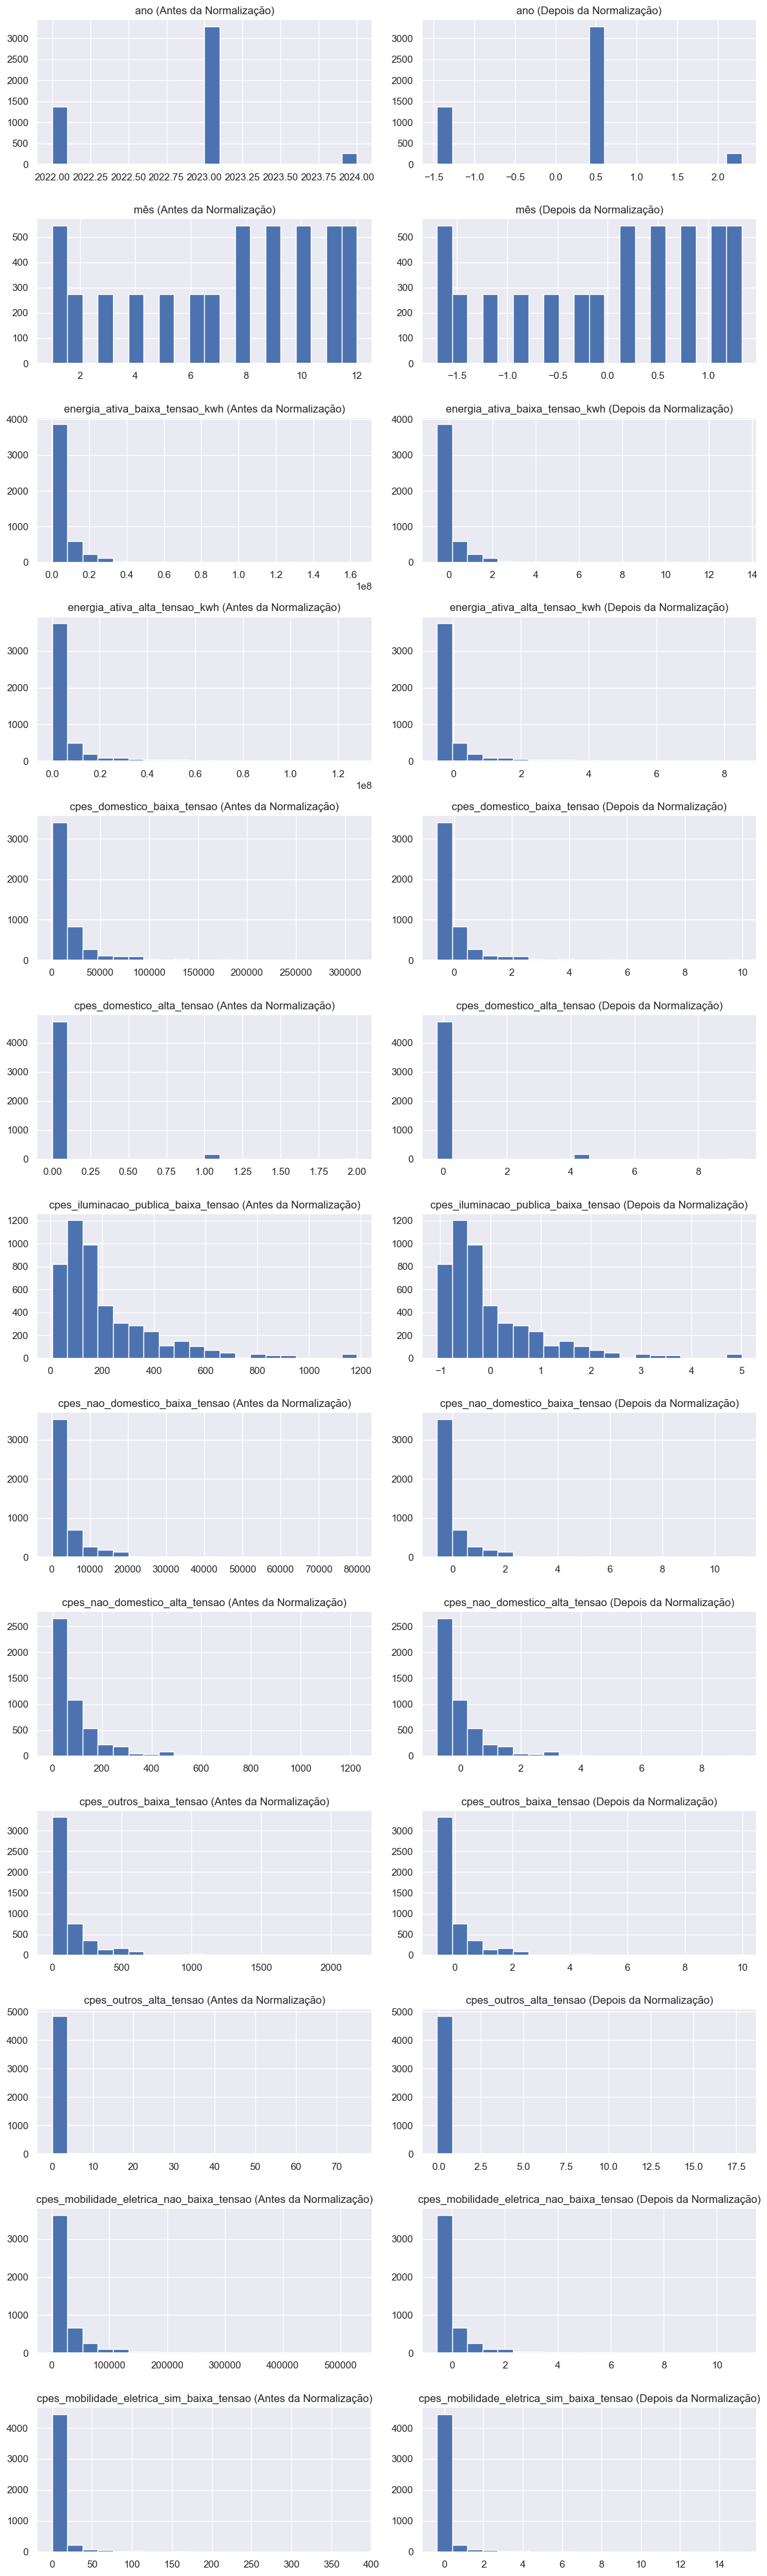

In [8]:
# Criar subplots
fig, axes = plt.subplots(nrows=len(merged_df.columns), ncols=2, figsize=(12, 40))

# Histogramas antes da normalização
for i, col in enumerate(merged_df.columns):
    merged_df[col].hist(ax=axes[i, 0], bins=20)
    axes[i, 0].set_title(col + ' (Antes da Normalização)')

# Histogramas depois da normalização
for i, col in enumerate(merged_df_scaled_z_score.columns):
    merged_df_scaled_z_score[col].hist(ax=axes[i, 1], bins=20)
    axes[i, 1].set_title(col + ' (Depois da Normalização)')

plt.tight_layout()
plt.show()


In [9]:
# Estatísticas resumidas antes da normalização
merged_df.describe()

,ano,mês,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914.000000,4914.000000,4.914000e+03,4.914000e+03,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,2022.777778,7.166667,6.473418e+06,6.872585e+06,18802.326414,0.040090,214.084046,4241.061661,95.435694,128.958079,0.385836,27020.995319,9.315832
std,0.532924,3.625129,1.161919e+07,1.423193e+07,29402.960918,0.209242,194.120963,6870.529538,121.195235,206.186626,4.184540,45854.018577,24.622134
min,2022.000000,1.000000,1.390660e+05,0.000000e+00,1042.000000,0.000000,7.000000,174.000000,0.000000,1.000000,0.000000,1144.000000,0.000000
25%,2022.000000,4.000000,1.269620e+06,4.162925e+05,4581.000000,0.000000,91.000000,1101.000000,28.000000,21.000000,0.000000,6044.000000,2.000000
50%,2023.000000,8.000000,2.618006e+06,1.837661e+06,8936.000000,0.000000,141.000000,1989.500000,51.000000,54.000000,0.000000,11336.000000,2.000000
75%,2023.000000,10.000000,7.045592e+06,5.952910e+06,21427.000000,0.000000,280.000000,4897.250000,119.000000,157.000000,0.000000,29565.500000,6.000000
max,2024.000000,12.000000,1.633807e+08,1.279470e+08,312074.000000,2.000000,1185.000000,79984.000000,1226.000000,2186.000000,75.000000,528158.000000,382.000000


In [10]:
# Estatísticas resumidas depois da normalização
merged_df_scaled_min_max.describe()

,ano,mês,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,0.388889,0.560606,0.038804,0.053714,0.057101,0.020045,0.175793,0.050959,0.077843,0.058562,0.005144,0.049101,0.024387
std,0.266462,0.329557,0.071178,0.111233,0.094534,0.104621,0.164789,0.086086,0.098854,0.094365,0.055794,0.087007,0.064456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.006926,0.003254,0.011378,0.000000,0.071307,0.011615,0.022838,0.009153,0.000000,0.009298,0.005236
50%,0.500000,0.636364,0.015186,0.014363,0.025380,0.000000,0.113752,0.022748,0.041599,0.024256,0.000000,0.019339,0.005236
75%,0.500000,0.818182,0.042309,0.046526,0.065540,0.000000,0.231749,0.059181,0.097064,0.071396,0.000000,0.053929,0.015707
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
